# Triangle areas for mesh spheres

This notebook calculates the area histograms for the triangulated spheres.

In [7]:
import numpy as np
import pyradi.ryfiles as ryfiles
import pyradi.ryplot as ryplot

vertexsphere_0_12.txt avg area=5.31e-01 tot area error=62.0966 Resolution=63.435 deg
vertexsphere_1_42.txt avg area=1.50e-01 tot area error=17.6955 Resolution=33.859 deg
vertexsphere_2_162.txt avg area=3.88e-02 tot area error=4.5663 Resolution=17.216 deg
vertexsphere_3_642.txt avg area=9.79e-03 tot area error=1.1486 Resolution=8.645 deg
vertexsphere_4_2562.txt avg area=2.45e-03 tot area error=0.2995 Resolution=4.327 deg
vertexsphere_5_10242.txt avg area=6.13e-04 tot area error=0.0905 Resolution=2.164 deg


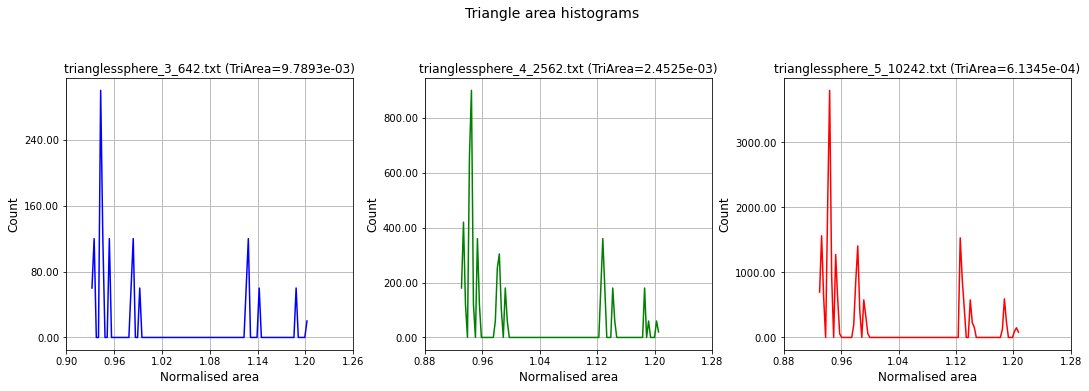

In [27]:
filelist = ryfiles.listFiles('.','trianglessphere*.*')
p=ryplot.Plotter(1,2,3,'Triangle area histograms',(18,12),doWarning=False)
for subplot,filename in enumerate( filelist):
    vtxfilename = filename.replace('triangles','vertex')
    tri=np.loadtxt(filename,dtype='i4')
    vtx = np.loadtxt(vtxfilename)
    areaLst = []
    angleLst = []
    areaTot = 0
    for triangle in tri:
        length = []
        peri = 0
        for i in range(0,3):
            vtxa = vtx[triangle[i]]
            vtxb = vtx[triangle[(i+1)%3]]
            angle = np.arccos(np.dot(vtxa,vtxb))
            length.append(angle)
            angleLst.append(angle)
            peri += angle
            
        # from heron's theorem the planar (not spherical) area between three points 
        # is given by Area=SQRT(s(s-a)(s-b)(s-c)), where s=(a+b+c)/2 or perimeter/2.
        s = peri/2
        area = np.sqrt(s * (s-length[0])  * (s-length[1])  * (s-length[2]) )
        areaLst.append(area )
        areaTot += area
     
    areaA = np.asarray(areaLst)
    hist,bins= np.histogram(areaA, bins=100)
    binc = bins[:-1]+np.diff(bins)
    agvArea = np.mean(areaA)
    agvAngle = 180 * np.mean(angleLst) / np.pi
    binc = binc / agvArea
    
#     print(areaTot)
#     print(f'tot area error={100*(4-(areaTot/np.pi)):.4f}')
    print(f'{vtxfilename:10s} avg area={agvArea:.2e} tot area error={100*(4-(areaTot/np.pi)):.4f} Resolution={agvAngle:.3f} deg')
    lowerExl = 2
    if(subplot > lowerExl and subplot < 8):
        ptitle = '{0} (TriArea={1:.4e})'.format(filename,agvArea)
        p.plot(subplot-lowerExl,binc,hist,xlabel='Normalised area',ylabel='Count',ptitle=ptitle)
    
p.saveFig('triangleareas.eps')
        
                    

Evidently the total surface error is relatively small for spheres with large number of vertices, but the area distribution is slightly skew around the average value, towards smaller areas.

See here http://corysimon.github.io/articles/uniformdistn-on-sphere/ for random placement on the sphere.